In [23]:
import numpy as np
import pandas as pd
import scipy
from math import sqrt
import matplotlib as plt
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

#estimators
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor

from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR,SVC
from sklearn import linear_model

# model metrics
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.model_selection import cross_val_score

# cross validation
from sklearn.model_selection import train_test_split

from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, LabelEncoder

# Data Input

In [10]:
credit = pd.read_csv('credit_final.csv')

In [16]:
credit= credit.drop(['ID','Def_nex_mt'],axis=1)
# drop duplicates
credit= credit.drop_duplicates()
# check for nulls
nulls = credit.isnull().sum()
nulls

LIMIT_BAL    0
SEX          0
BILL_AMT1    0
BILL_AMT2    0
BILL_AMT3    0
            ..
PAY_6_6      0
PAY_6_7      0
PAY_6_8      0
age_40-60    0
age_60-79    0
Length: 80, dtype: int64

In [18]:
credit.describe()

,LIMIT_BAL,SEX,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,...,PAY_6_0,PAY_6_2,PAY_6_3,PAY_6_4,PAY_6_5,PAY_6_6,PAY_6_7,PAY_6_8,age_40-60,age_60-79
count,29666.000000,29666.000000,29666.000000,29666.000000,2.966600e+04,29666.000000,29666.000000,29666.000000,29666.000000,2.966600e+04,...,29666.000000,29666.000000,29666.000000,29666.000000,29666.000000,29666.00000,29666.000000,29666.000000,29666.000000,29666.000000
mean,166975.988674,0.397189,51799.333311,49732.061956,4.754184e+04,43749.412256,40764.633722,39308.784703,5727.194768,5.987678e+03,...,0.548979,0.093238,0.006169,0.001584,0.000438,0.00064,0.001416,0.000067,0.273613,0.002899
std,129815.335133,0.489324,73847.725162,71381.171698,6.955846e+04,64529.504570,60987.362235,59745.022120,16645.344180,2.316164e+04,...,0.497604,0.290771,0.078300,0.039772,0.020929,0.02530,0.037601,0.008211,0.445820,0.053765
min,10000.000000,0.000000,-165580.000000,-69777.000000,-1.572640e+05,-170000.000000,-81334.000000,-339603.000000,0.000000,0.000000e+00,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000
25%,50000.000000,0.000000,3919.250000,3346.250000,3.042500e+03,2550.750000,2000.000000,1435.250000,1000.000000,1.000000e+03,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000
50%,140000.000000,0.000000,23188.000000,21986.500000,2.051050e+04,19317.000000,18419.000000,17463.000000,2157.500000,2.039000e+03,...,1.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000
75%,240000.000000,1.000000,67939.500000,64812.000000,6.097400e+04,55418.500000,50677.750000,49626.500000,5025.000000,5.000000e+03,...,1.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,1.000000,0.000000
max,1000000.000000,1.000000,964511.000000,983931.000000,1.664089e+06,891586.000000,927171.000000,961664.000000,873552.000000,1.684259e+06,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000


<function matplotlib.pyplot.show(close=None, block=None)>

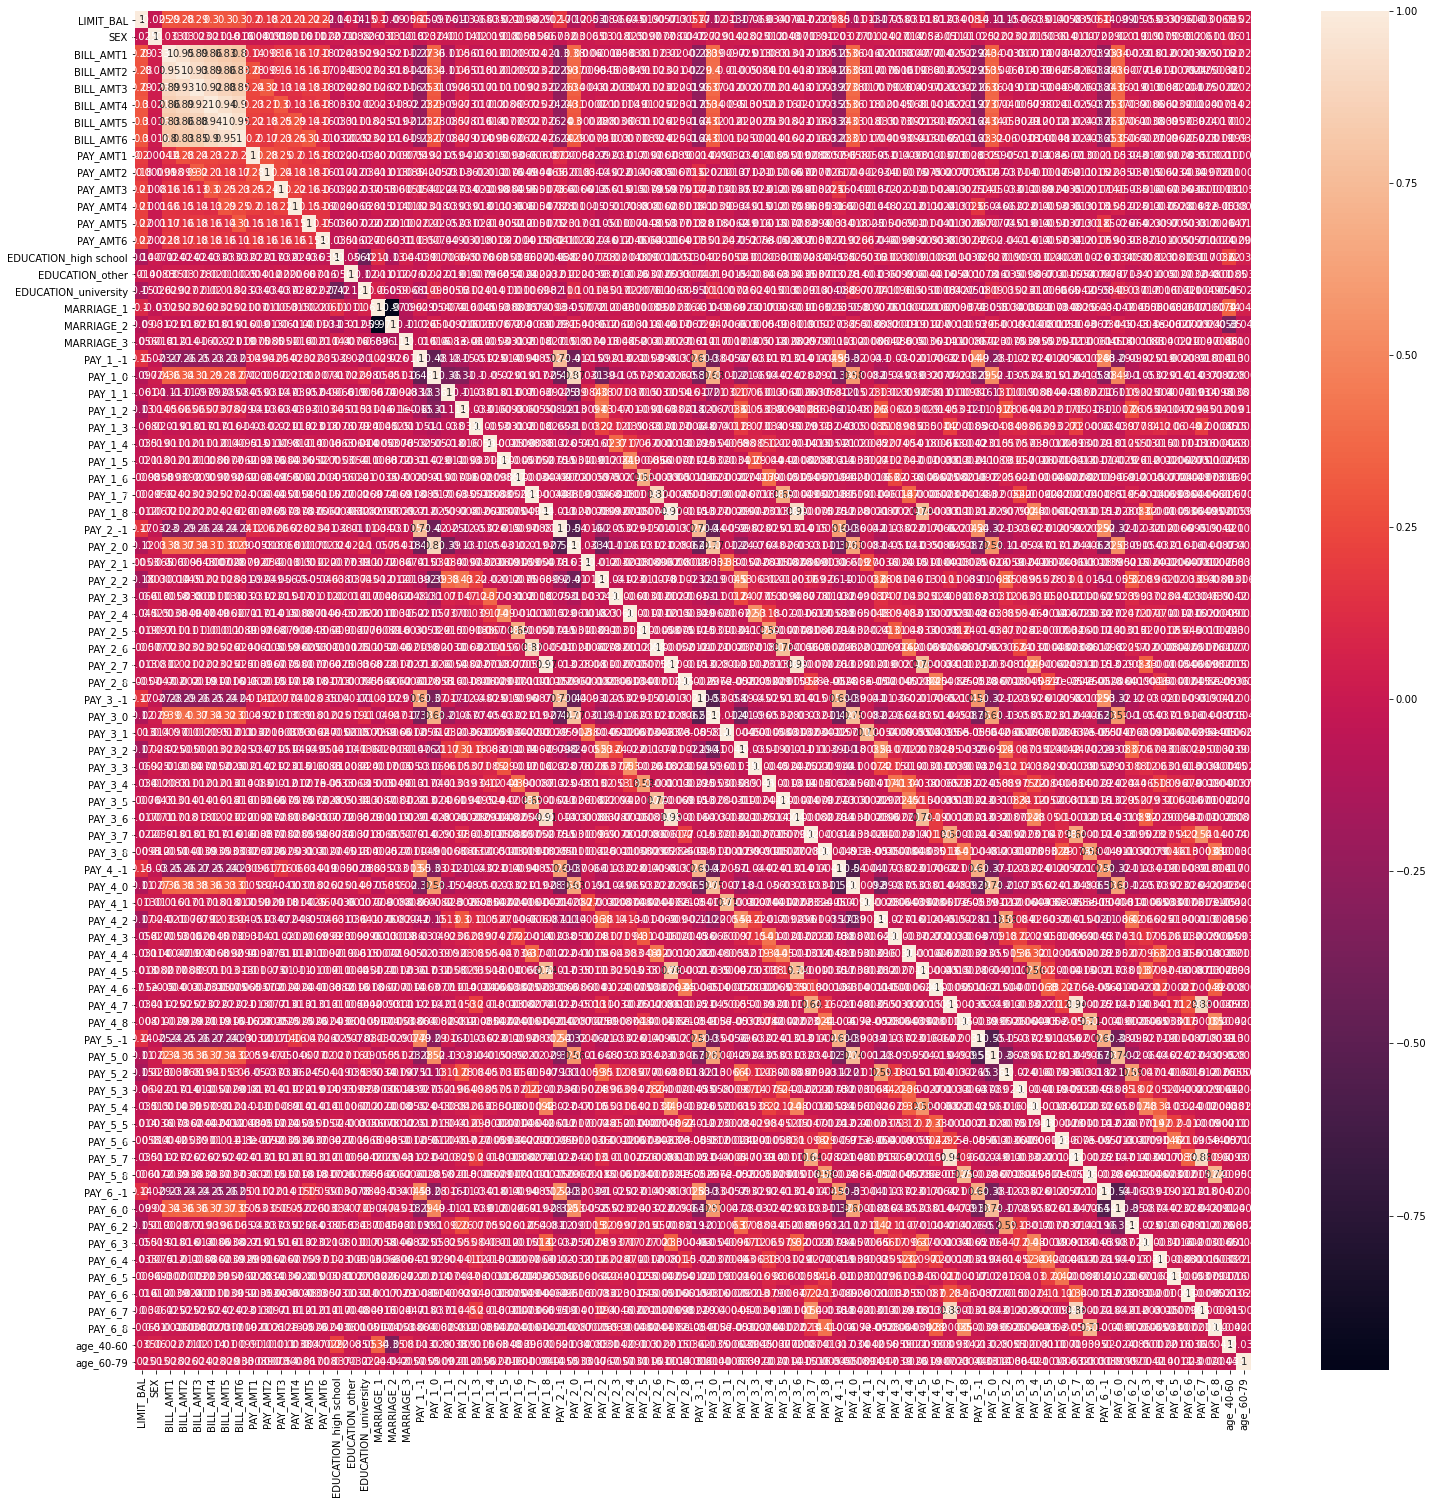

In [27]:
credit_corr = credit.corr ()
plt.figure(figsize=(25,25))
sns.heatmap(credit_corr,annot=True)
plt.show

In [63]:
# features
X = credit.iloc[:,1:]
# dep var
y= credit['LIMIT_BAL']
# SPLIT
X_train,X_test, y_train, y_test = train_test_split(X,y,test_size = .25, random_state=123)

In [64]:
algos_Class=[]
algos_Class.append(('Random Forest', RandomForestRegressor()))
algos_Class.append(('Linear Model', LinearRegression()))
algos_Class.append(('SVR', SVR()))

In [65]:
# Regression
results=[]
names=[]
for name,model in algos_Class:
    result = cross_val_score(model, X,y, cv=3)
    names.append (name)
    results.append(result)

In [66]:
for i in range(len(names)):
    print(names[i],results[i].mean())

Random Forest 0.42720717809865966
Linear Model 0.38609131389951434
SVR -0.049531231871231464


In [34]:
credit.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 29666 entries, 0 to 29999
Data columns (total 80 columns):
 #   Column                 Non-Null Count  Dtype
---  ------                 --------------  -----
 0   LIMIT_BAL              29666 non-null  int64
 1   SEX                    29666 non-null  int64
 2   BILL_AMT1              29666 non-null  int64
 3   BILL_AMT2              29666 non-null  int64
 4   BILL_AMT3              29666 non-null  int64
 5   BILL_AMT4              29666 non-null  int64
 6   BILL_AMT5              29666 non-null  int64
 7   BILL_AMT6              29666 non-null  int64
 8   PAY_AMT1               29666 non-null  int64
 9   PAY_AMT2               29666 non-null  int64
 10  PAY_AMT3               29666 non-null  int64
 11  PAY_AMT4               29666 non-null  int64
 12  PAY_AMT5               29666 non-null  int64
 13  PAY_AMT6               29666 non-null  int64
 14  EDUCATION_high school  29666 non-null  int64
 15  EDUCATION_other        29666 non-nul

In [89]:
# features
X1 = credit.iloc[:,lambda data:[1,8,9,10,11,12,13,78,79]]
# dep var
y1 = credit['LIMIT_BAL']
# SPLIT
X1_train,X1_test, y1_train, y1_test = train_test_split(X1,y1,test_size = .25, random_state=123)

In [90]:
algos_Class1=[]
algos_Class1.append(('Random Forest', RandomForestRegressor()))
algos_Class1.append(('Linear Model', LinearRegression(normalize=True)))
algos_Class1.append(('SVR', SVR()))

In [91]:
# Regression
results1=[]
names1=[]
for name1,model1 in algos_Class1:
    result1 = cross_val_score(model1, X1,y1, cv=3)
    names1.append (name1)
    results1.append(result1)

In [92]:
for i in range(len(names1)):
    print(names1[i],results1[i].mean())

Random Forest 0.2977498945812935
Linear Model 0.12083503857825528
SVR -0.050560813063725986


# Selection of Features
X1 = credit.iloc[:,lambda data: <br>
[1,              (Sex)<br>
8,9,10,11,12,13, (amount payed)<br>
78,79            (age)<br>
Random Forest 0.29760186250586834<br>
Linear Model 0.12083503857826423<br>
SVR -0.050560813063725986<br>
Same values for normalize True or False<br>
<br>
X1 = credit.iloc[:,lambda data: <br>
**All Data**<br>
Random Forest 0.42720717809865966<br>
Linear Model 0.38609131389951434<br>
SVR -0.049531231871231464br><br>


In [93]:
print(cross_val_score(model1,X,y,cv=3))

[-0.03360819 -0.00408933 -0.11089618]


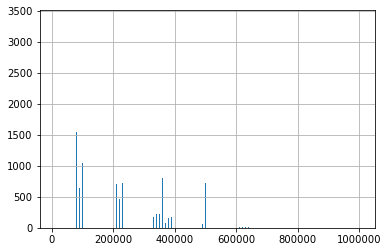

In [101]:
pd.set_option('display.float_format',lambda x:'%.2f' % x)
credit['LIMIT_BAL'].hist(bins=1000
                        )
plt.ticklabel_format(style='plain', axis='x', useOffset=False)

In [165]:
# defining bins
bins= [0,20000,40000,60000,80000,100000,
       120000,140000,160000,180000,200000,
       220000,240000,260000,280000,300000,
       320000,340000,360000,380000,400000,
       420000,440000,460000,480000,500000,
       520000,540000,560000,580000,600000,
       620000,640000,660000,680000,700000,
       720000,740000,760000,780000,800000,
       820000,840000,860000,880000,900000,
       920000,940000,960000,980000,1000000]
# naming groups
group_names= ['0-20000',
              '20000-40000',
              '40000-60000',
              '60000-80000',
              '80000-100000',
              
              '100000-120000',
              '120000-140000',
              '140000-160000',
              '160000-180000',
              '180000-200000',
              
              '200000-220000',
              '220000-240000',
              '240000-260000',
              '260000-280000',
              '280000-300000',
              
              '300000-320000',
              '320000-340000',
              '340000-360000',
              '360000-380000',
              '380000-400000',
              
              '400000-420000',
              '420000-440000',
              '440000-460000',
              '460000-480000',
              '480000-500000',
              
              '500000-520000',
              '520000-540000',
              '540000-560000',
              '560000-580000',
              '580000-600000',
              
              '600000-620000',
              '620000-640000',
              '640000-660000',
              '660000-680000',
              '680000-700000',
              
              '700000-720000',
              '720000-740000',
              '740000-760000',
              '760000-780000',
              '780000-800000',
              
              '800000-820000',
              '820000-840000',
              '840000-860000',
              '860000-880000',
              '880000-900000',
              
              '900000-920000',
              '920000-940000',
              '940000-960000',
              '960000-980000',
              '980000-100000']
# Adding limit balance ranges
credit['LIMIT_BAL_RANG']=pd.cut(credit["LIMIT_BAL"], bins, labels=group_names)
credit

,LIMIT_BAL,SEX,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,...,PAY_6_2,PAY_6_3,PAY_6_4,PAY_6_5,PAY_6_6,PAY_6_7,PAY_6_8,age_40-60,age_60-79,LIMIT_BAL_RANG
0,20000,0,3913,3102,689,0,0,0,0,689,...,0,0,0,0,0,0,0,0,0,0-20000
1,120000,0,2682,1725,2682,3272,3455,3261,0,1000,...,1,0,0,0,0,0,0,0,0,100000-120000
2,90000,0,29239,14027,13559,14331,14948,15549,1518,1500,...,0,0,0,0,0,0,0,0,0,80000-100000
3,50000,0,46990,48233,49291,28314,28959,29547,2000,2019,...,0,0,0,0,0,0,0,0,0,40000-60000
4,50000,1,8617,5670,35835,20940,19146,19131,2000,36681,...,0,0,0,0,0,0,0,1,0,40000-60000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,220000,1,188948,192815,208365,88004,31237,15980,8500,20000,...,0,0,0,0,0,0,0,0,0,200000-220000
29996,150000,1,1683,1828,3502,8979,5190,0,1837,3526,...,0,0,0,0,0,0,0,1,0,140000-160000
29997,30000,1,3565,3356,2758,20878,20582,19357,0,0,...,0,0,0,0,0,0,0,0,0,20000-40000
29998,80000,1,-1645,78379,76304,52774,11855,48944,85900,3409,...,0,0,0,0,0,0,0,1,0,60000-80000


In [166]:
le= LabelEncoder()
le.fit(credit['LIMIT_BAL_RANG'])

LabelEncoder()

In [167]:
credit['LIMIT_BAL_RANG'] = le.transform(credit['LIMIT_BAL_RANG'])

In [168]:
credit.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 29666 entries, 0 to 29999
Data columns (total 81 columns):
 #   Column                 Non-Null Count  Dtype
---  ------                 --------------  -----
 0   LIMIT_BAL              29666 non-null  int64
 1   SEX                    29666 non-null  int64
 2   BILL_AMT1              29666 non-null  int64
 3   BILL_AMT2              29666 non-null  int64
 4   BILL_AMT3              29666 non-null  int64
 5   BILL_AMT4              29666 non-null  int64
 6   BILL_AMT5              29666 non-null  int64
 7   BILL_AMT6              29666 non-null  int64
 8   PAY_AMT1               29666 non-null  int64
 9   PAY_AMT2               29666 non-null  int64
 10  PAY_AMT3               29666 non-null  int64
 11  PAY_AMT4               29666 non-null  int64
 12  PAY_AMT5               29666 non-null  int64
 13  PAY_AMT6               29666 non-null  int64
 14  EDUCATION_high school  29666 non-null  int64
 15  EDUCATION_other        29666 non-nul

In [217]:
X_2 = credit.iloc[:,:]
y_2= credit['LIMIT_BAL_RANG']
X_2_train, X_2_test, y_2_train, y_2_test = train_test_split(X_2,y_2,test_size=0.5,random_state=123)

In [224]:
from sklearn import datasets
from sklearn.tree import plot_tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn import metrics

In [225]:
algo_2 = DecisionTreeClassifier(max_depth=8)
model_2 = algo_2.fit (X_2_train , y_2_test)

In [226]:
y_2_pred_2 = model_2.predict(X_2_test)

In [227]:
print (classification_report(y_2_test,y_2_pred_2))

              precision    recall  f1-score   support

           0       0.05      0.01      0.01      1172
           1       0.04      0.01      0.01       639
           2       0.00      0.00      0.00       726
           3       0.04      0.01      0.01       920
           4       0.00      0.00      0.00       741
           5       0.06      0.00      0.01       844
           6       0.09      0.04      0.05       897
           7       0.17      0.00      0.00       586
           8       0.00      0.00      0.00       682
           9       0.00      0.00      0.00       439
          10       0.00      0.00      0.00       359
          11       0.00      0.00      0.00       455
          12       0.00      0.00      0.00       288
          13       0.00      0.00      0.00       192
          14       0.00      0.00      0.00       521
          15       0.00      0.00      0.00       109
          16       0.00      0.00      0.00       218
          17       0.14    

C:\Users\garyg\.conda\envs\Credone\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [228]:
print("Accuracy:",metrics.accuracy_score(y_2_test, y_2_pred_2))

Accuracy: 0.13173329737746917


In [ ]:
X_3 = credit.iloc[:,:]
y_3= credit['LIMIT_BAL_RANG']
X_3_train, X_3_test, y_3_train, y_3_test = train_test_split(X_3,y_3,test_size=0.35,random_state=123)